
## Hamad Hasan 20L-2076
## Saad Waseem 20L-1102
## Raheem Ahmed Khan 19l-1243





In [2]:
#Data store on google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## unzipping

!unzip "/content/drive/MyDrive/DataScienceProject.zip" -d "/content/"

Archive:  /content/drive/MyDrive/DataScienceProject.zip
   creating: /content/DataScienceProject/benign/
  inflating: /content/DataScienceProject/benign/benign (179).png  
  inflating: /content/DataScienceProject/benign/benign (18).png  
  inflating: /content/DataScienceProject/benign/benign (180).png  
  inflating: /content/DataScienceProject/benign/benign (181).png  
  inflating: /content/DataScienceProject/benign/benign (182).png  
  inflating: /content/DataScienceProject/benign/benign (183).png  
  inflating: /content/DataScienceProject/benign/benign (184).png  
  inflating: /content/DataScienceProject/benign/benign (185).png  
  inflating: /content/DataScienceProject/benign/benign (186).png  
  inflating: /content/DataScienceProject/benign/benign (187).png  
  inflating: /content/DataScienceProject/benign/benign (188).png  
  inflating: /content/DataScienceProject/benign/benign (189).png  
  inflating: /content/DataScienceProject/benign/benign (19).png  
  inflating: /content/Data

Following is the picture of app interface using gradio

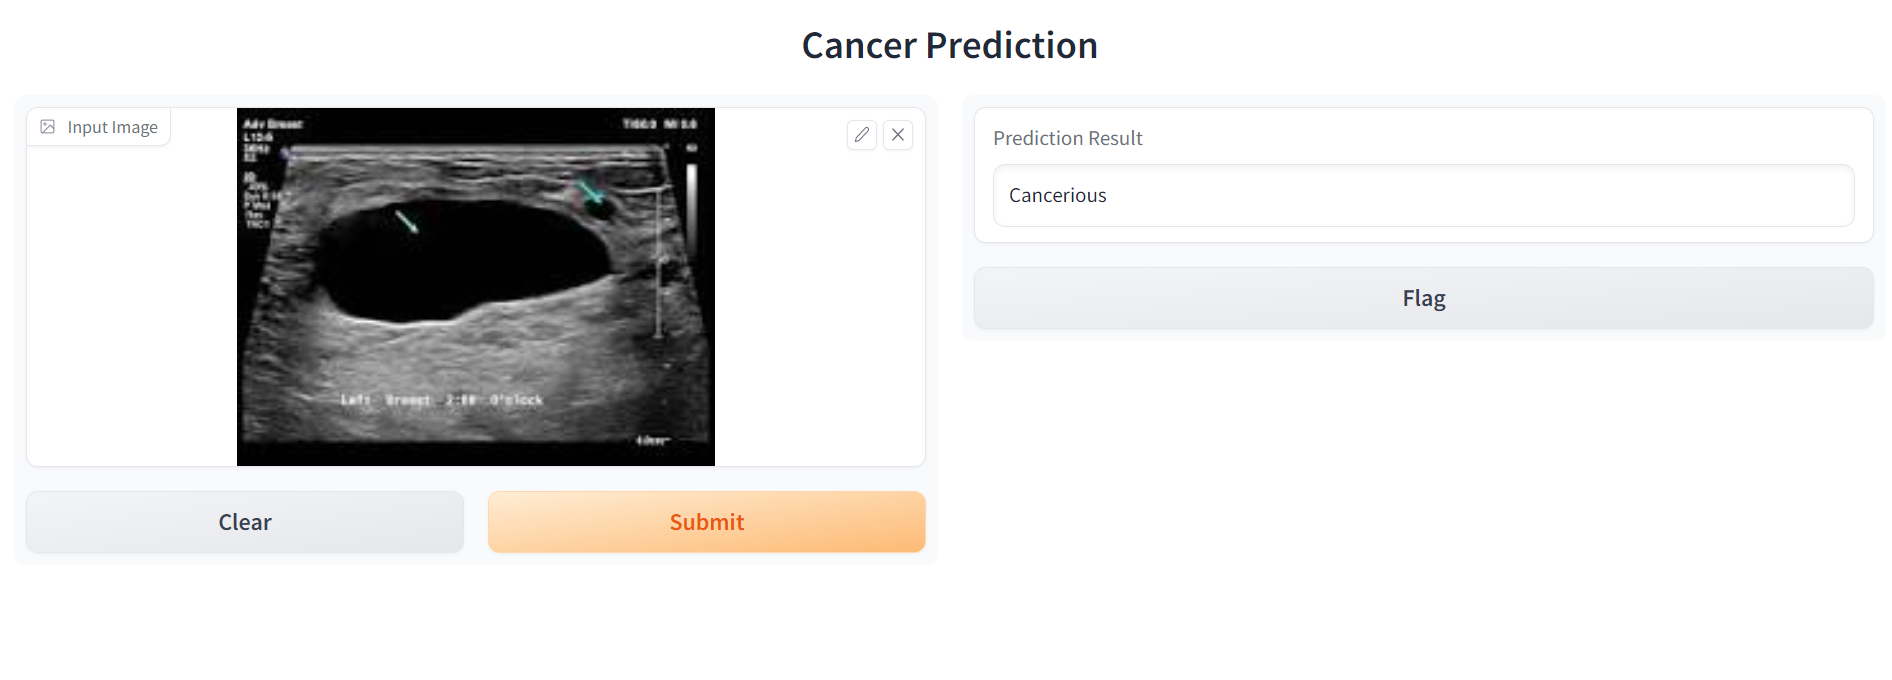

In [4]:
#here we unzip data after loading from google drive

In [6]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.core.common import flatten

import glob

import os
import random
import matplotlib.pyplot as plt
#test train division of data
from sklearn.model_selection import train_test_split
import cv2

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve


In [7]:
train_data_path='/content/DataScienceProject/train' #path of image data

**Transformation**

In [8]:
def ResizeImage(img):
    
    #img = cv2.imread('D:\CancerImages\DataScienceProject/train/benign (2).png', cv2.IMREAD_UNCHANGED)
   
    #print('Original Dimensions : ',img.shape)
 
    width = 256
    height = 256
    dim = (width, height)
  
# resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
    #print('Resized Dimensions : ',resized.shape)
 
    #plt.imshow(resized)
    return resized


In [9]:
train_image_paths = [] #to store image paths in list

#1.
# get all the paths from train_data_path and append image paths and class to to respective lists
# eg. train path-> 'images/train/26.Pont_du_Gard/4321ee6695c23c7b.jpg'
# eg. class -> 26.Pont_du_Gard
#for data_path in glob.glob(train_data_path + '/*.png'):
train_image_paths.append(glob.glob(train_data_path + '/*'))
    
train_image_paths = list(flatten(train_image_paths))
random.shuffle(train_image_paths)

print('train_image_path example: ', train_image_paths[0])

train_image_path example:  /content/DataScienceProject/train/malignant (90).png


In [10]:
normal_image_path=[]
normal_test_path=[]
normal_image_path=(glob.glob("/content/DataScienceProject/normal/*.png"))
normal_test_path=(glob.glob("/content/DataScienceProject/test_normal/*.png"))
len(normal_test_path)

20

In [11]:
test_image_path=[]
test_image_path=glob.glob("/content/DataScienceProject/test/*.png")
len(test_image_path)

27

In [12]:
aug_cancer_train=[]
aug_normal_train=[]
aug_cancer_test=[]
aug_normal_test=[]

aug_cancer_test=glob.glob("/content/drive/MyDrive/aug_cancer_test/*.png")
aug_cancer_train=glob.glob("/content/drive/MyDrive/aug_cancer_train/*.png")
aug_normal_test=glob.glob("/content/drive/MyDrive/aug_normal_test/*.png")
aug_normal_train=glob.glob("/content/drive/MyDrive/aug_normal_train/*.png")

In [13]:
img=plt.imread(aug_normal_test[0])
img.shape

(256, 256, 3)

**Normalization**

Example of normalization.Actually when we read matplolib.pyplot function imread(). This function read in dtype=float32 so it is altready normalize.

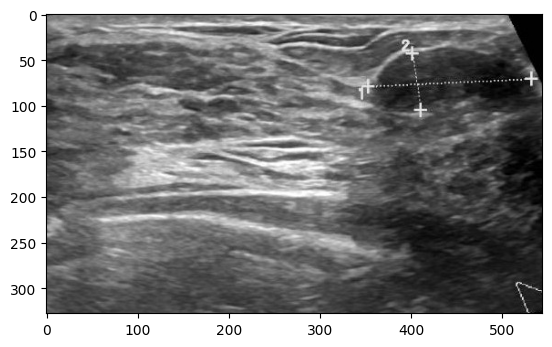

In [14]:
img=plt.imread(test_image_path[0])
plt.imshow(img)


In [15]:
train=[]
test=[]
for path in train_image_paths:
    img=plt.imread(path)
    train.append((ResizeImage(img),1))
for path in normal_image_path:
    img=plt.imread(path)
    train.append((ResizeImage(img),0))


    #-------------------------------------------------Below is testing--------------------------------------

for path in test_image_path:
    img=plt.imread(path)
    test.append((ResizeImage(img),1))
for path in normal_test_path:
    img=plt.imread(path)
    test.append((ResizeImage(img),0))



In [16]:
#Augmented Block
for path in aug_normal_train:
    img=plt.imread(path)
    train.append((img,0))
for path in aug_cancer_train:
    img=plt.imread(path)
    train.append((img,1))
    #----------------------------testing-----------------
for path in aug_normal_test:
    img=plt.imread(path)
    test.append((img,0))
for path in aug_cancer_test:
    img=plt.imread(path)
    test.append((img,1))

In [17]:
for i in range(2):
 random.shuffle(train)
 random.shuffle(test)

In [18]:
len(test)

94

In [19]:
X_train=[]
y_train=[]
X_test=[]
y_test=[]
for i in range(len(train)):
  X_train.append(train[i][0])
  y_train.append(train[i][1])
for i in range(len(test)):
  X_test.append(test[i][0])
  y_test.append(test[i][1])




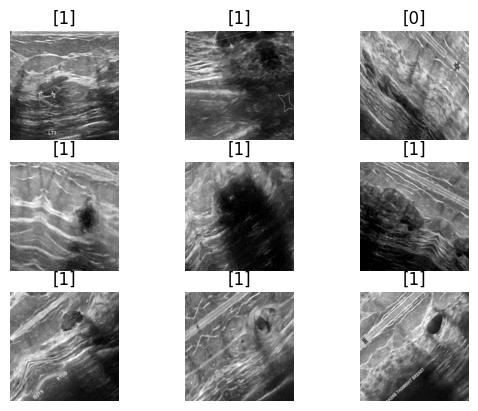

In [20]:
#display data with titles (Validation)
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i],cmap="bone")
    plt.title([y_train[i]])
    plt.axis("off")

In [21]:
#length of train data
len(y_train)


778

In [22]:
len(X_train)


778